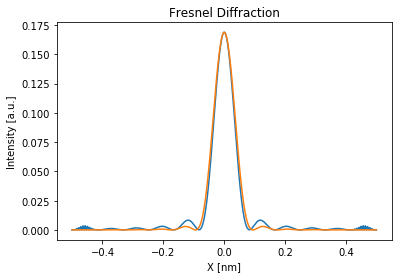

In [114]:
import numpy as np
import random

if __name__ == '__main__':
    
    
    mean = 50 #energy in MeV
    std_dev = 2
    kinetic_energy = int(random.normalvariate(mean, std_dev))
    h = 6.5821e-22  #Planks constant in MeV*sec
    c = 299792458  #speed of light in m/sec
    wavelength = h*c/kinetic_energy  #De broglie wavelenght of the e, v->c
    source_size = 15e-9 #in m
    detector_size = 1e-6
    distance = 0.3
    npoints = 1000
    wavenumber = np.pi*2.0/wavelength
    
    npoints = 1000
    
    position_x = np.linspace(-detector_size/2,detector_size/2,npoints)
    xoffset = position_x[0]
    xdelta = position_x[1] - position_x[0]
    xsize = npoints
    r = (position_x**2+distance**2)**0.5
    
    fields1 = np.ones(npoints) + 0j
    fields1[np.where(position_x < -0.5*source_size)] = 0.0
    fields1[np.where(position_x >  0.5*source_size)] = 0.0

    if 0:
        wavenumber = 2.0*np.pi/wavelength
        fields1 *= numpy.exp(-wavenumber*1j*position_x)
    
    fft_size = npoints
    fft_delta = 1.0/xsize/xdelta
    if numpy.mod(npoints,2) == 1:
        fft_offset = -fft_delta*float(npoints-1)/2.0
    else:
        fft_offset = -fft_delta*float(npoints)/2.0

    #FT
    F1 = np.fft.fft(fields1)
    wfou_fft = np.fft.fftshift(F1) #shift zero to the center
    wfou_fft_x = np.arange(start=fft_offset, stop = -fft_offset, step=fft_delta)

    #propagate
    wfou_fft *= np.exp(-1j * np.pi * wavelength * distance * wfou_fft_x**2 )
    
    #back FT
    fields2 = np.fft.ifft(wfou_fft)

    fieldIntensity = np.abs(fields2)**2
    fieldPhase = np.arctan2(np.real(fields2), np.imag(fields2))

    from matplotlib import pylab as plt
    from scipy.special import jv
    
    #Solving Kirghof integral with Bessel function I(theta)=I(max)*(2*Jv(U)/U)**2
    sin_theta = position_x / distance
    x = (2*np.pi/wavelength) * (source_size/2) * sin_theta #x=U=k*R*sin(theta)
    U = 2*jv(1,x)/x
    I = U**2 * fieldIntensity.max()
    
    plt.figure(1)
    plt.plot(position_x*1e6,fieldIntensity, position_x*1e6,I)
    plt.title("Fresnel Diffraction")
    plt.xlabel("X [nm]")
    plt.ylabel("Intensity [a.u.]")
    plt.show()
